In [2]:
import os
# import drjit
gpu_num = 0 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy
from pathlib import Path
from cycler import cycler

In [3]:
exclude_list = ['bers/report/singular_values.pickle']
files = Path('bers/report').glob('**/*.pickle')
for f in files:
    if str(f) not in exclude_list:
        print(f)

bers/report/frequency/perf_vs_est_csi.pickle
bers/report/frequency/velocity_mitigation.pickle
bers/report/frequency/velocity_factors.pickle
bers/report/frequency/bler_params.pickle
bers/report/frequency/num_ues_est_csi.pickle
bers/report/frequency/num_ues_mitigated.pickle
bers/report/frequency/ian_vs_pos.pickle
bers/report/frequency/num_ues.pickle
bers/report/frequency/num_silent.pickle
bers/report/frequency/mitigation_dim.pickle
bers/report/frequency/perf_vs_est_csi_multi_ut.pickle


In [7]:
from itertools import compress

def set_style(plot_ber, cycler, is_bler=False, **kwargs):
    assert not is_bler, "BLER is not supported"
    snrs = list(compress(plot_ber._snrs, np.invert(plot_ber._is_bler)))
    bers = list(compress(plot_ber._bers, np.invert(plot_ber._is_bler)))
    legends = list(compress(plot_ber._legends, np.invert(plot_ber._is_bler)))
    is_bler = list(compress(plot_ber._is_bler, np.invert(plot_ber._is_bler)))

    fig, ax = sionna.utils.plot_ber(
        snrs,
        bers,
        legends,
        title = plot_ber.title,
        is_bler = is_bler,
        **kwargs
    )

    cycler_iter = cycler()
    for i, l in enumerate(ax.get_lines()):
        l.set(**next(cycler_iter))
    ax.legend(legends, fontsize=20)
    return fig

In [4]:
f = 'bers/report/frequency/perf_vs_est_csi.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(ylim=(1e-6, 1), save_fig=True, path=graph_file)

f = 'bers/report/frequency/velocity_mitigation.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(ylim=(1e-5, 1), save_fig=True, path=graph_file)

f = 'bers/report/frequency/velocity_factors.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    # TODO change linestyle of no mobility
    ber = pickle.load(file)
    ber.title = 'Mobility: Impact of parameters at 120 km/h'
    ber._legends = ['No Mobility', '3.5GHz CF, 30kHz SCS, 128 SCs', '450MHz CF', '240kHz SCS, 16 SCs', '1024 SCs']
    ber(ylim=(1e-5, 1), save_fig=True, path=graph_file)

f = 'bers/report/frequency/bler_params.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(show_ber=False, ylim=(None, 1), save_fig=True, path=graph_file)

f = 'bers/report/frequency/ian_vs_pos.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(ylim=(1e-5, 1), save_fig=True, path=graph_file)

f = 'bers/report/frequency/num_ues.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber.remove(2)
    ber.remove(2)
    ber.title = 'Perf. CSI, 1x1 Jammer: Impact of number of UEs'
    line_props = cycler(color=['b', 'r']) * cycler(ls=['-.', '-'])
    fig = set_style(ber, line_props, ylim=(1e-3, 1))
    plt.savefig(graph_file)
    plt.close(fig)
    # ber(ylim=(None, 1))

f = 'bers/report/frequency/num_ues_est_csi.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber.remove(2)
    ber.remove(2)
    ber.title = 'Est. CSI, 1x1 Jammer: Impact of number of UEs'
    line_props = cycler(color=['b', 'r']) * cycler(ls=['-.', '-'])
    fig = set_style(ber, line_props, ylim=(1e-3, 1))
    plt.savefig(graph_file)
    plt.close(fig)

f = 'bers/report/frequency/num_silent.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    line_props = cycler(color=plt.cm.viridis(np.linspace(0.3, 0.9, 7))) * cycler(linestyle=['-'])
    line_props = cycler(color=['r'], linestyle=['-.']).concat(line_props)
    fig = set_style(ber, line_props, ylim=(5e-4, 1))
    plt.savefig(graph_file)
    plt.close(fig)

f = 'bers/report/frequency/num_silent_1x3.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    line_props = cycler(color=plt.cm.viridis(np.linspace(0.3, 0.9, 7))) * cycler(linestyle=['-'])
    line_props = cycler(color=['r'], linestyle=['-.']).concat(line_props)
    fig = set_style(ber, line_props, ylim=(5e-4, 1))
    plt.savefig(graph_file)
    plt.close(fig)

f = 'bers/report/frequency/mitigation_dim.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(ylim=(None, 1), save_fig=True, path=graph_file)

In [7]:
f = 'bers/report/frequency/bler_jammerless.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(ylim=(3.5e-4, 1), show_ber=False, save_fig=True, path=graph_file)


dict_keys(['no cp, NR', 'cp, NR', 'long cp', 'multitap, no cp', '802.11'])


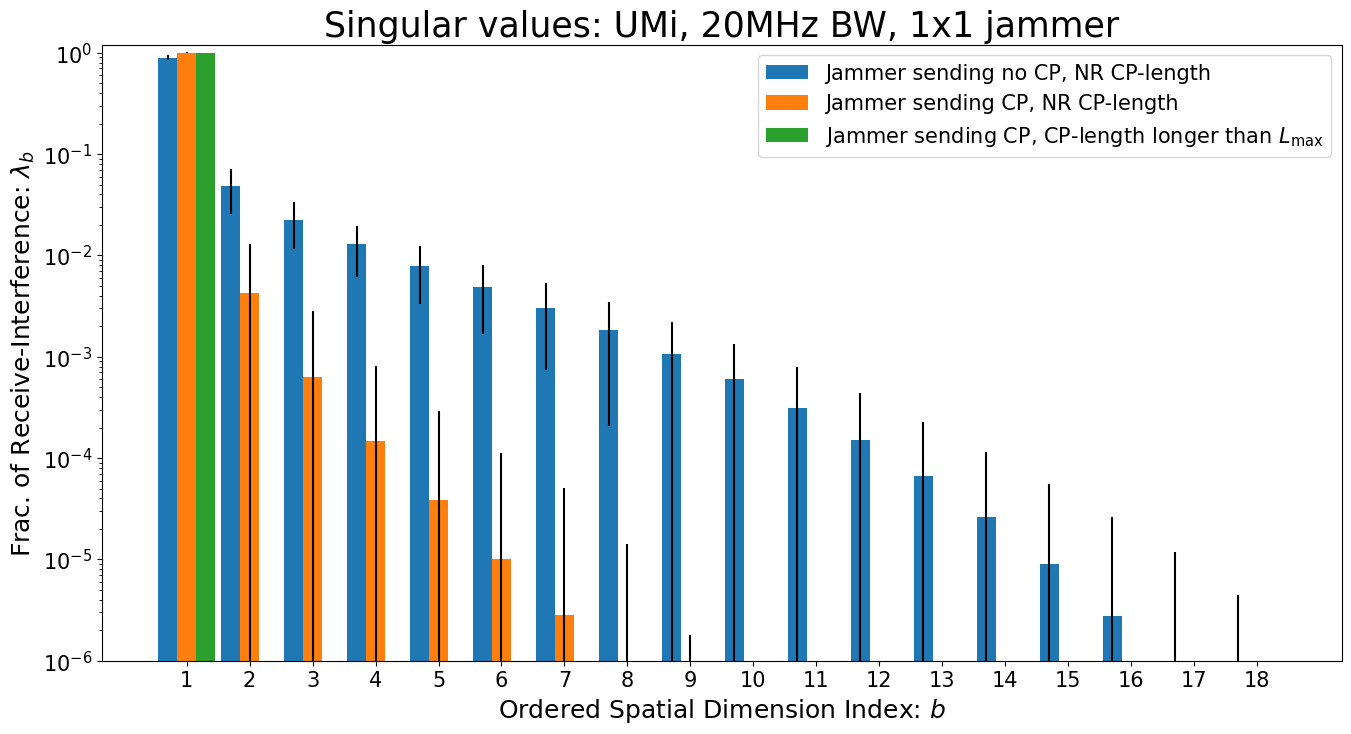

In [20]:
f = "bers/report/singular_values.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, "rb") as f:
    data = pickle.load(f)
print(data.keys())
del data['multitap, no cp']
del data['802.11']

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

labels = ["Jammer sending no CP, NR CP-length",
          "Jammer sending CP, NR CP-length",
          "Jammer sending CP, CP-length longer than $L_{\\text{max}}$",]

for i, (k, v) in enumerate(data.items()):
    mean, std = v
    x_labels = np.arange(len(mean), dtype=np.int32) + 1
    ax.bar(x_labels+(i-1)*0.3, mean, 0.3, yerr=std, label=f"{labels[i]}")
ax.set_yscale('log')
ax.set_ylim(1e-6, 1.2)
ax.set_xticks(x_labels)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.legend(fontsize=15)
ax.set_ylabel(r"Frac. of Receive-Interference: $\lambda_b$", fontsize=18)
ax.set_xlabel(r"Ordered Spatial Dimension Index: $b$", fontsize=18)
ax.set_title("Singular values: UMi, 20MHz BW, 1x1 jammer", fontsize=25)
fig.savefig(graph_file)

dict_keys(['multitap, no cp, 3 taps', 'multitap, no cp, 6 taps'])


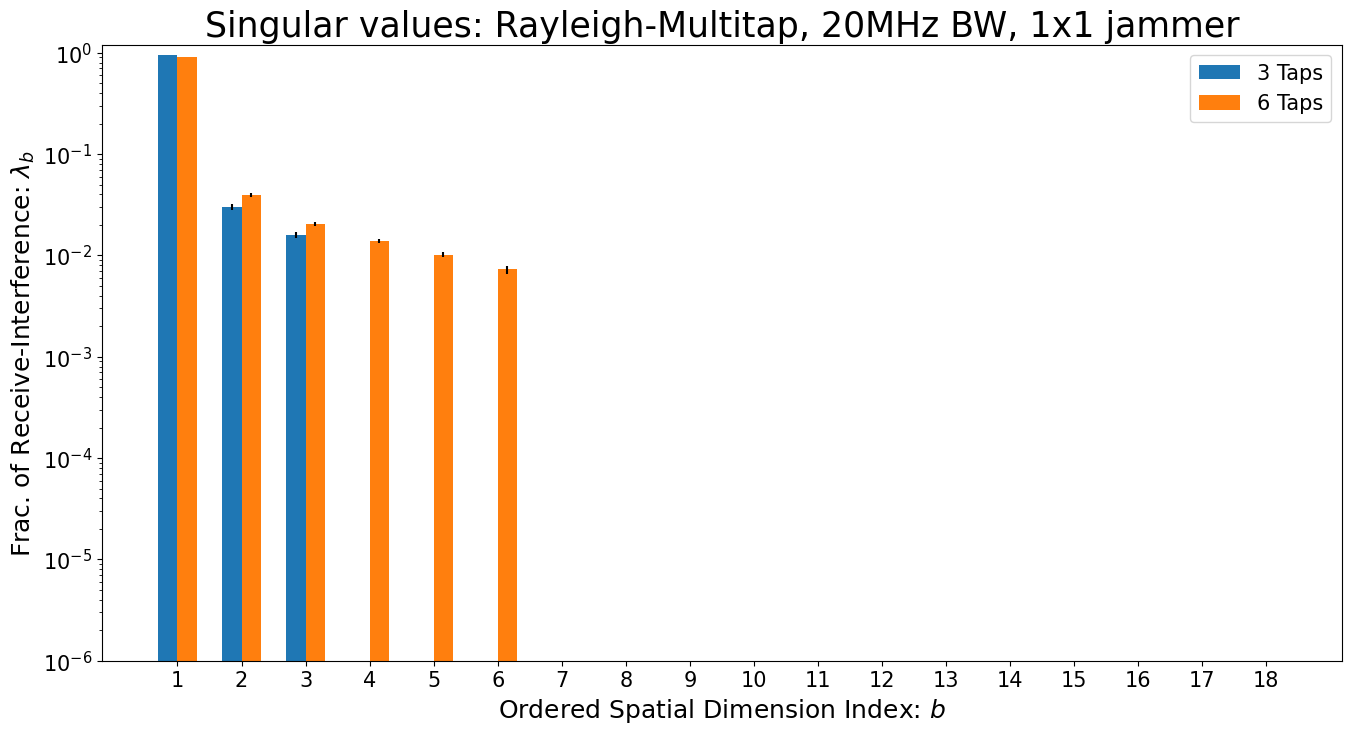

In [5]:
f = "bers/report/singular_values_multitap_rayleigh.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, "rb") as f:
    data = pickle.load(f)
print(data.keys())

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

labels = ["3 Taps", "6 Taps"]

for i, (k, v) in enumerate(data.items()):
    mean, std = v
    x_labels = np.arange(len(mean), dtype=np.int32) + 1
    ax.bar(x_labels+(i-0.5)*0.3, mean, 0.3, yerr=std, label=f"{labels[i]}")
ax.set_yscale('log')
ax.set_ylim(1e-6, 1.2)
ax.set_xticks(x_labels)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.legend(fontsize=15)
ax.set_ylabel(r"Frac. of Receive-Interference: $\lambda_b$", fontsize=18)
ax.set_xlabel(r"Ordered Spatial Dimension Index: $b$", fontsize=18)
ax.set_title("Singular values: Rayleigh-Multitap, 20MHz BW, 1x1 jammer", fontsize=25)
fig.savefig(graph_file)

In [19]:
f = "bers/time_pos_umi_est_1ue_long_ds.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    bers = pickle.load(file)
    bers.remove(0)
    bers.remove(0)
    for i in range(len(bers._legends)):
        bers._legends[i] = bers._legends[i].replace(', Time Domain', '')
    bers(ylim=(1e-5, 1), save_fig=True, path=graph_file)

In [12]:
from itertools import compress
f = "bers/report/learning/losses_5dB-SNR_train.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, "rb") as file:
    bers = pickle.load(file)
bers.title = "Trained at 5dB SNR, 1x1 0dB Jammer, Est. CSI, POS"
# remove BLERs
bers._snrs = list(compress(bers._snrs, np.invert(bers._is_bler)))
bers._bers = list(compress(bers._bers, np.invert(bers._is_bler)))
bers._legends = list(compress(bers._legends, np.invert(bers._is_bler)))
bers._is_bler = list(compress(bers._is_bler, np.invert(bers._is_bler)))
# remove unwanted
bers.remove(0)
bers.remove(-1)
f2 = "bers/report/learning/losses_0dB-SNR_train.pickle"
with open(f2, "rb") as file2:
    bers2 = pickle.load(file2)
bers2.remove(0)
bers2.remove(0)
# merge
for i in range(len(bers2._legends)):
    bers.add(bers2._snrs[i], bers2._bers[i], bers2._is_bler[i], bers2._legends[i])
bers._legends = ['L1, trained at 5dB SNR',
                 'MSE, trained at 5dB SNR',
                 'Log, trained at 5dB SNR',
                 'L1, trained at 0dB SNR',
                 'MSE, trained at 0dB SNR',
                 'Log, trained at 0dB SNR']

line_props = cycler(ls=['-.', '-']) * cycler(color=['b', 'r', 'g']) 
fig = set_style(bers, line_props, ylim=(5e-2, 1))
graph_file = 'graphs/report/learning/losses_comparison.png'
fig.savefig(graph_file)
plt.close(fig)

In [2]:
f = "bers/report/learning/l1_SNRs_train.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, "rb") as file:
    bers = pickle.load(file)
bers.title = "Trained at different SNRs over whole RG: 1UE, 1x1 0dB Jammer, Est. CSI, POS"
bers(ylim=(None, 1.1), save_fig=True, path=graph_file)

In [9]:
f = "bers/report/learning/snr_symbol_weight.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, "rb") as file:
    bers = pickle.load(file)
    bers.title = "Trained at different SNRs, symbol weights: 4UEs,  1x1 0dB Jammer, Est. CSI, POS"
bers(save_fig=True, path=graph_file)

In [11]:
f = "bers/report/learning/integrated_vs_variable_constraint.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, "rb") as file:
    bers = pickle.load(file)
bers.title = "Multiple UEs, Integrated vs. Variable Constraint: Est. CSI, 1x1 0dB Jammer"

line_props =  cycler(ls=['-.', '-']) * cycler(color=['b', 'r', 'g', 'y'])
fig = set_style(bers, line_props, ylim=(None, 1.1))
fig.savefig(graph_file)
plt.close(fig)

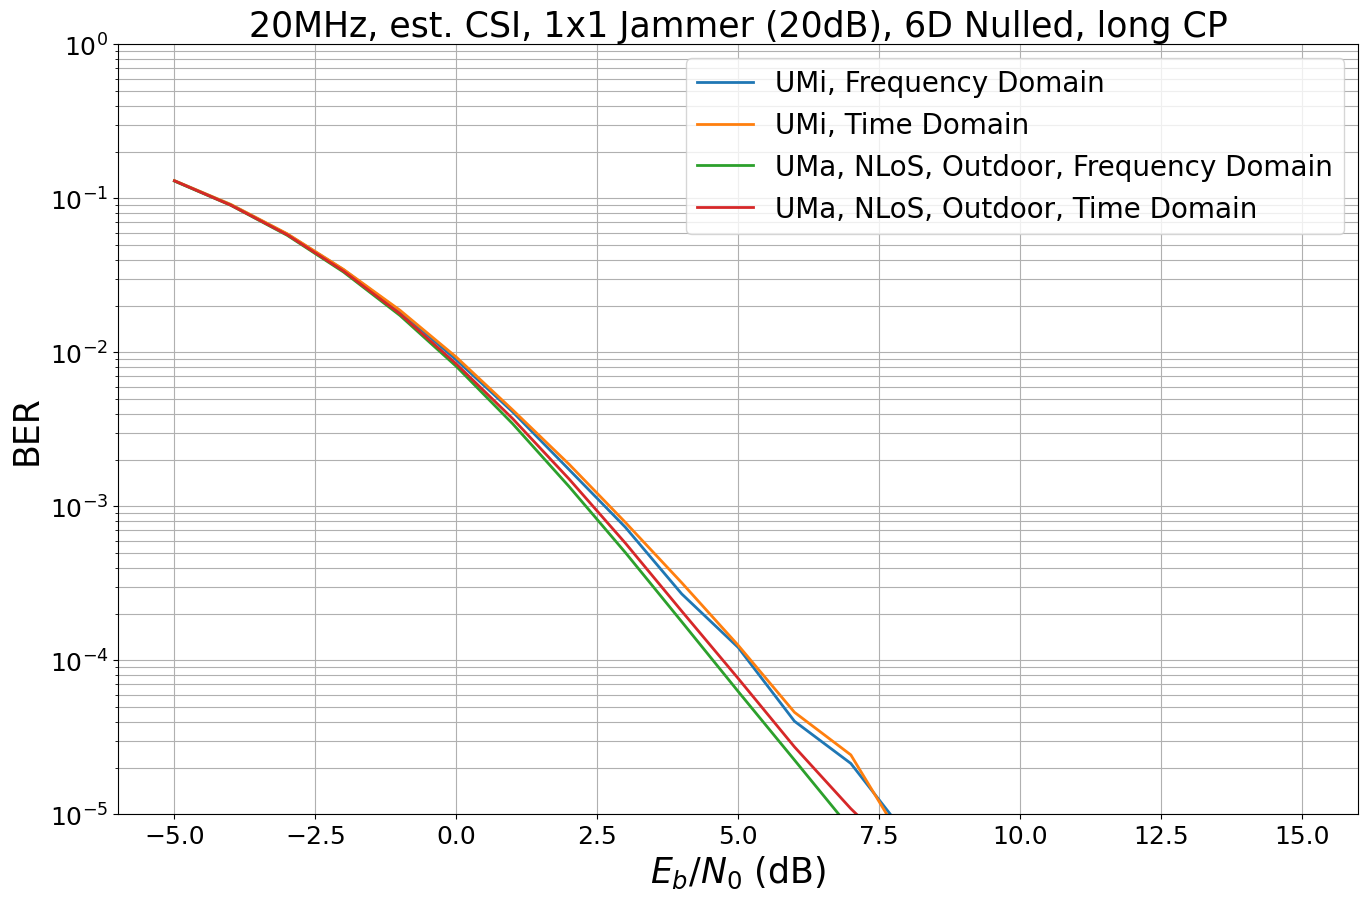

In [4]:
f = "bers/time_pos_umi_uma.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    bers = pickle.load(file)
bers(ylim=(1e-5, 1))

In [14]:
f = "bers/report/learning/nonneg_vs_neg.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, "rb") as file:
    bers = pickle.load(file)
line_props =  cycler(color=['b', 'r', 'g', 'y']) * cycler(ls=['-.', '-'])
fig = set_style(bers, line_props, ylim=(None, 1.8))
fig.savefig(graph_file)
plt.close(fig)

In [20]:
f = "bers/report/learning/rg_vs_symbol_weight_new.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, "rb") as file:
    bers = pickle.load(file)
bers.title = "Multiple UEs, RG vs. Symbol Weight: Est. CSI, 1x1 0dB Jammer"
line_props = cycler(ls=['-.', '-']) * cycler(color=['b', 'r', 'g', 'y'])
fig = set_style(bers, line_props, ylim=(None, 1.8))
fig.savefig(graph_file)
plt.close(fig)